# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
data = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
color = data.groupby('color').agg({'price':np.mean}).sort_values(by='price')
print(data.describe())
color

              carat           cut         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      2.904097      2.594197      3.051020     61.749405   
std        0.474011      1.116600      1.701105      1.647136      1.432621   
min        0.200000      0.000000      0.000000      0.000000     43.000000   
25%        0.400000      2.000000      1.000000      2.000000     61.000000   
50%        0.700000      3.000000      3.000000      3.000000     61.800000   
75%        1.040000      4.000000      4.000000      4.000000     62.500000   
max        5.010000      4.000000      6.000000      7.000000     79.000000   

              table         price             x             y             z  
count  53940.000000  53940.000000  53932.000000  53933.000000  53932.000000  
mean      57.457184   3932.799722      5.732007      5.733820      3.539735  
std        2.234491   3989.439738      1.119670      1

,price
color,
1,3076.752475
0,3169.954096
2,3724.886397
3,3999.135671
4,4486.669196
5,5091.874954
6,5323.818020


In [4]:
#your comments here
# it is inexpected, since the color 0 = D(best) is less expensive the color 6 = J(worst) 
# i can't say for now what else might be corelated to the color

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
# all the features will probably affect the price, the ones that might be more important is
# weight (carat) and size (x,y,z), but also color and clarity.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
#your code here
colors = pd.pivot_table(data, columns='color').T
colors

,carat,clarity,cut,depth,price,table,x,y,z
color,,,,,,,,,
0,0.657795,2.691513,2.927380,61.698125,3169.954096,57.404590,5.417851,5.421928,3.343320
1,0.657867,2.969889,2.894355,61.662090,3076.752475,57.491201,5.411580,5.416292,3.337767
2,0.736538,3.133934,2.885559,61.694582,3724.886397,57.433536,5.616727,5.620634,3.465938
3,0.771190,3.463425,2.991233,61.757111,3999.135671,57.288629,5.678549,5.681198,3.507966
4,0.911799,2.933646,2.876927,61.836850,4486.669196,57.517811,5.984776,5.980103,3.699147
5,1.026927,2.964035,2.874585,61.846385,5091.874954,57.577278,6.222826,6.222700,3.846369
6,1.162137,2.776353,2.731838,61.887215,5323.818020,57.812393,6.519338,6.518053,4.033251


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
#your thoughts here
# analysing we can see that color 6(worst) is also the ones that are heavier (carats) and larger,
# therefore, explaining the higher prices over the color 0(best).

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

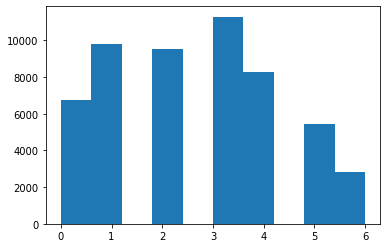

In [8]:
#your code here
plt.hist(data['color'])
plt.show()

In [9]:
#your comments here
# we can see that there is less worst colors in data, and more medium quality colors. 

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [10]:
#your code here
# i prefer the pivot table for this:
carats = pd.pivot_table(data, columns='carat').T
carats

,clarity,color,cut,depth,price,table,x,y,z
carat,,,,,,,,,
0.20,2.833333,0.833333,3.166667,61.100000,365.166667,59.333333,3.786667,3.753333,2.303333
0.21,2.666667,0.555556,2.888889,60.511111,380.222222,58.444444,3.874444,3.837778,2.332222
0.22,2.600000,1.200000,2.400000,61.620000,391.400000,60.400000,3.898000,3.848000,2.386000
0.23,4.901024,1.481229,2.255973,61.426621,486.143345,58.034130,3.946382,3.973379,2.431468
0.24,4.972441,1.814961,2.555118,61.599213,505.185039,57.488189,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...,...
4.00,0.000000,5.000000,2.000000,63.300000,15984.000000,58.000000,10.010000,9.940000,6.310000
4.01,0.000000,5.500000,3.000000,61.750000,15223.000000,61.500000,10.080000,9.938852,6.205000
4.13,0.000000,4.000000,0.000000,64.800000,17329.000000,61.000000,10.000000,9.850000,6.430000


In [11]:
#your comments
# it confirms that heavier diamonds have bigger size (x,y,z) and usually worse color,
# but also a bigger price.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

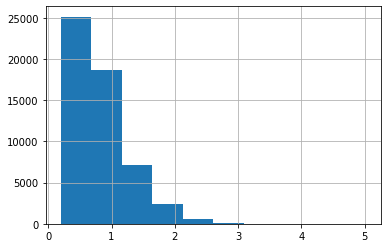

In [12]:
#your code here
data['carat'].hist()
# there are more lighter diamonds, as shown in the skewed plot

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [13]:
#your code here
# i don't care much for the groupby method in these cases:
table = pd.pivot_table(data, columns='table').T
table

,carat,clarity,color,cut,depth,price,x,y,z
table,,,,,,,,,
43.0,1.0400,4.00,5.0,4.0,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,4.00,1.0,2.0,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.00,3.0,0.0,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,2.00,3.0,0.0,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,1.00,4.0,0.0,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...,...
71.0,0.6800,2.00,3.0,0.0,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,3.25,1.5,0.0,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,2.00,3.0,0.0,65.30,2362.0,5.520,5.130,3.350


In [14]:
#your comments here
# it's harder to find correlation just by looking at these results

**Finally, do the same with the `clarity` column.**

In [15]:
#your code here
clarity = pd.pivot_table(data, columns='clarity').T
clarity

,carat,color,cut,depth,price,table,x,y,z
clarity,,,,,,,,,
0,1.283846,3.031039,1.974359,62.734278,3924.168691,58.303779,6.761093,6.708961,4.224688
1,1.077648,2.530020,2.666957,61.772167,5063.028606,57.927181,6.404157,6.394356,3.952642
2,0.850482,2.551550,2.747264,61.853042,3996.001148,57.662541,5.888383,5.888256,3.640636
3,0.763935,2.505792,2.978871,61.724417,3924.989395,57.417401,5.658633,5.659782,3.492788
4,0.727158,2.838208,3.000979,61.667458,3839.455391,57.315151,5.572860,5.579229,3.437925
5,0.596202,2.430517,3.116857,61.663778,3283.737071,57.024990,5.218454,5.232118,3.221465
6,0.503321,2.648427,3.228454,61.624651,2523.114637,56.884460,4.961721,4.976437,3.062132
7,0.505123,2.898324,3.432961,61.510615,2864.839106,56.507207,4.968402,4.989827,3.061659


In [16]:
#your comments here
# the clarity is pretty uniform with color, worst clarity for the heavier diamonds, but also
# bigger prices. It's possible to see some relation with the table now.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [17]:
#your thoughts here
# it really feels like the price is mostly affected by the weight, as my inicial hypothesis, which, by
# it's turn, is influenced by the size (x,y,z)
# to make sure, let's correlate:
[(x,data[x].corr(data['price'])) for x in data.columns]

[('carat', 0.9215913011934789),
 ('cut', -0.0534906608681044),
 ('color', 0.17251092815346736),
 ('clarity', -0.14680007107895013),
 ('depth', -0.01064740458414299),
 ('table', 0.1271339021217423),
 ('price', 0.9999999999999999),
 ('x', 0.8872265289341956),
 ('y', 0.8888201927011808),
 ('z', 0.881924335643478)]

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


C:\Users\felip\Miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\felip\Miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


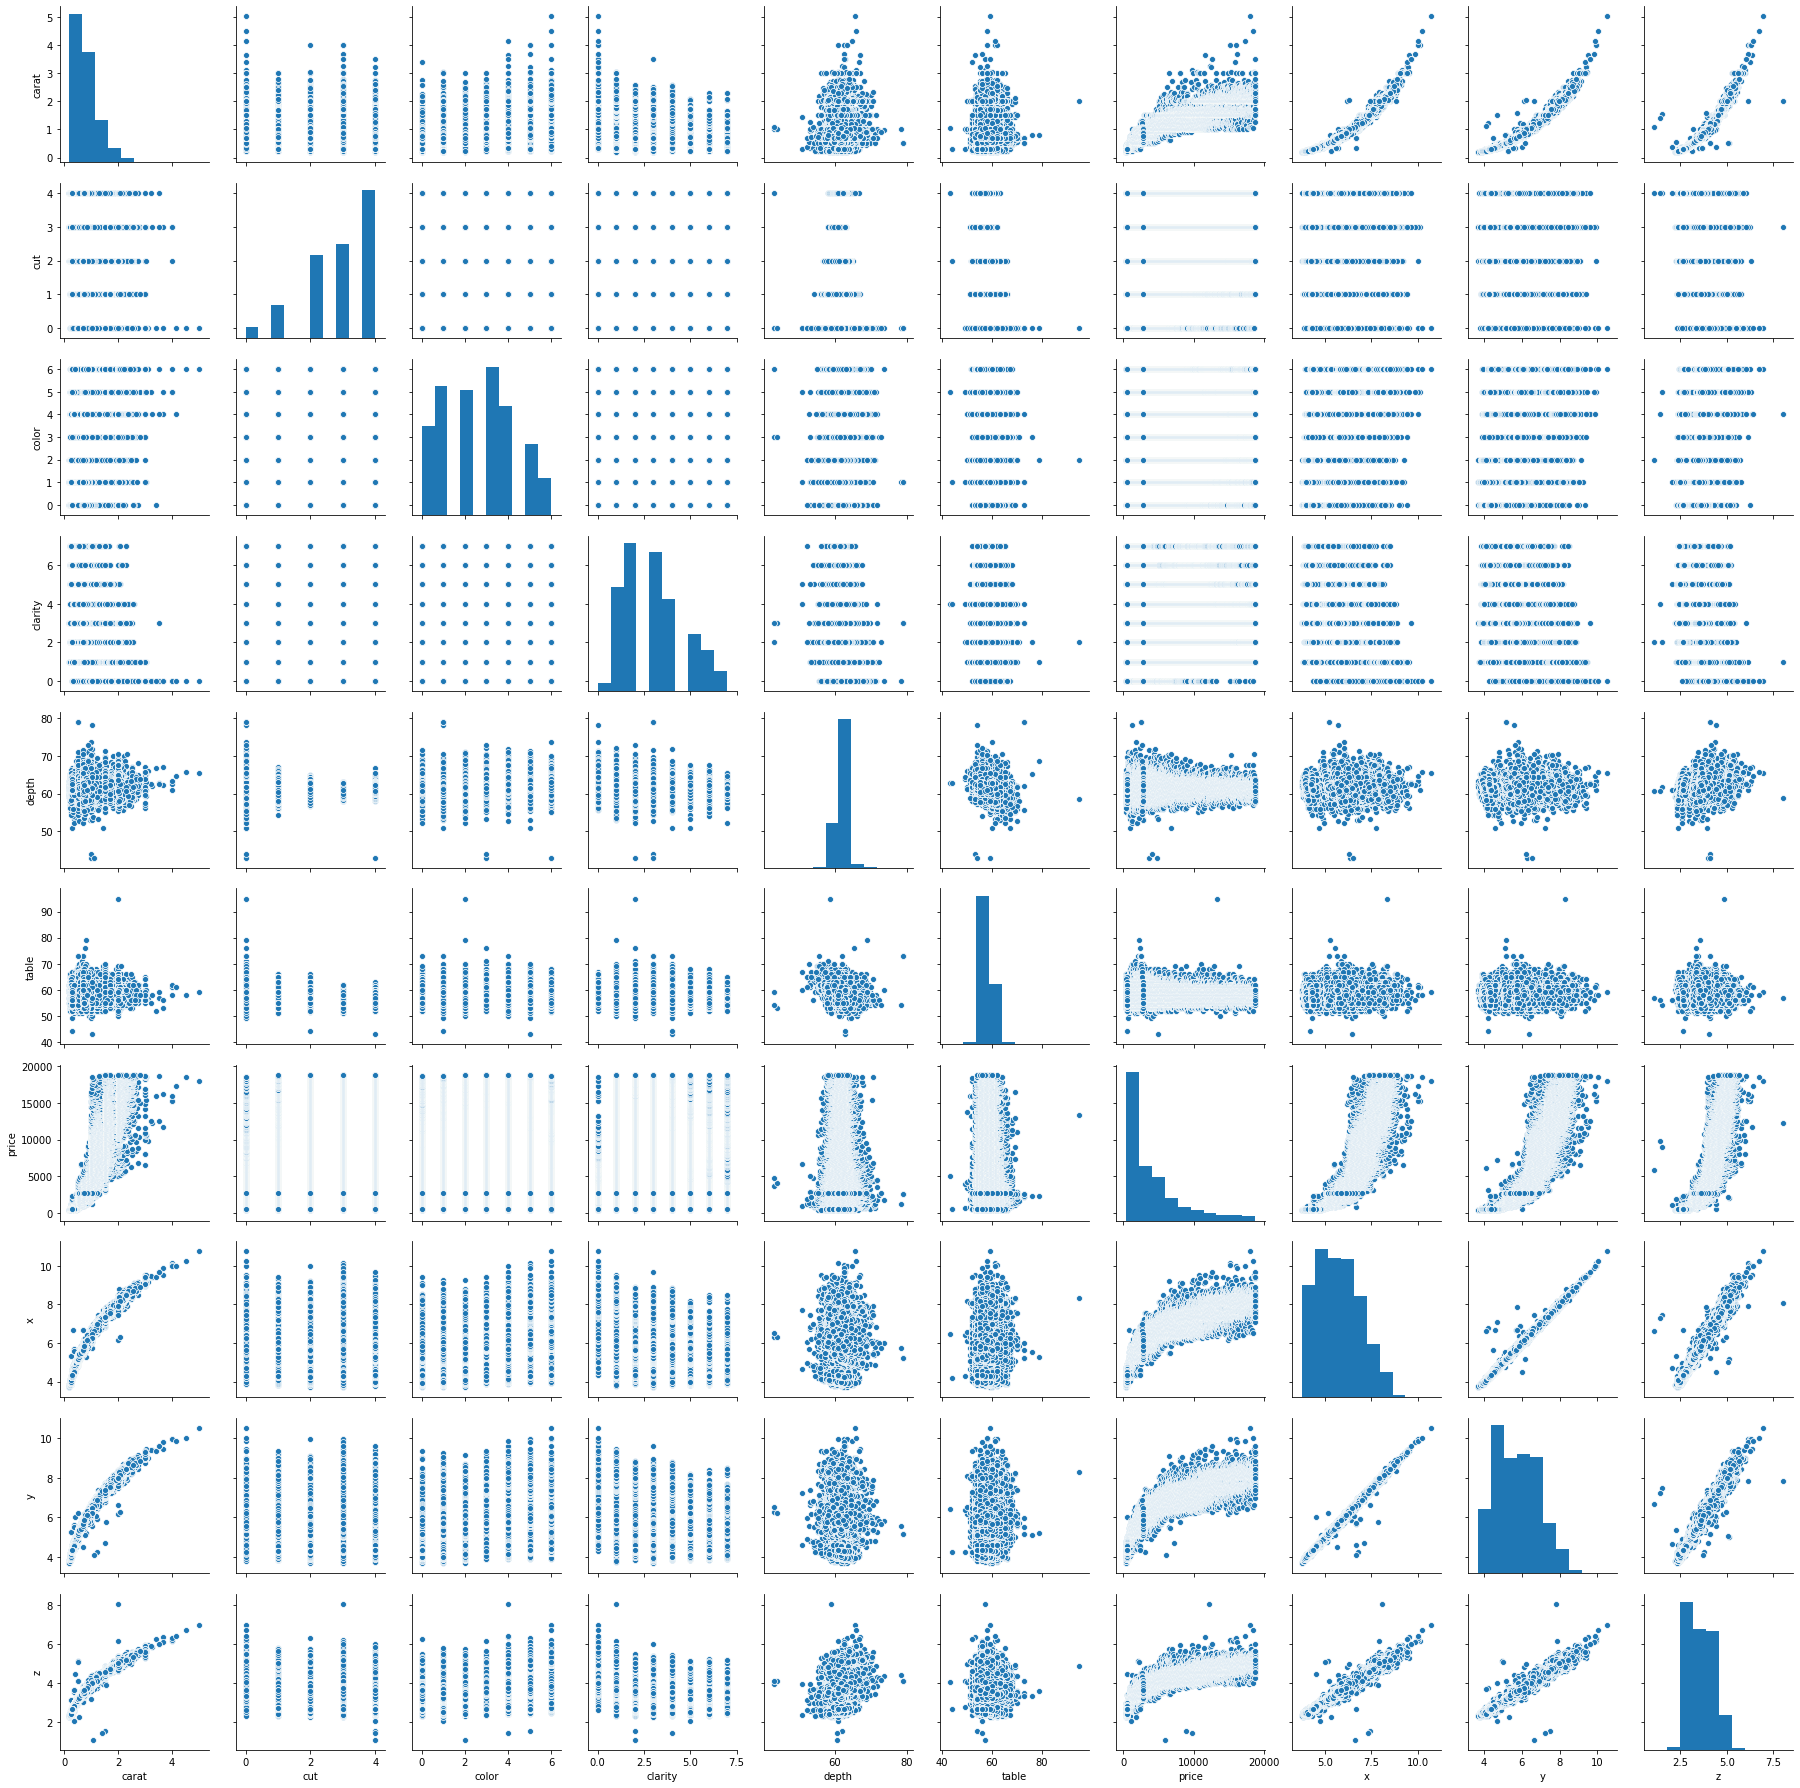

In [18]:
#Run this code
import seaborn as sns
sns.pairplot(data)

**What do you see here? What relationships between variables are the most interesting?**

In [19]:
#your thoughts here
# as noted before, the carat is the most related to the price of the diamond, and also the
# elements that are most related with the weight, like the size(x,y,z)
# we can also see the there are more heavier diamonds with worse color and clarity

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

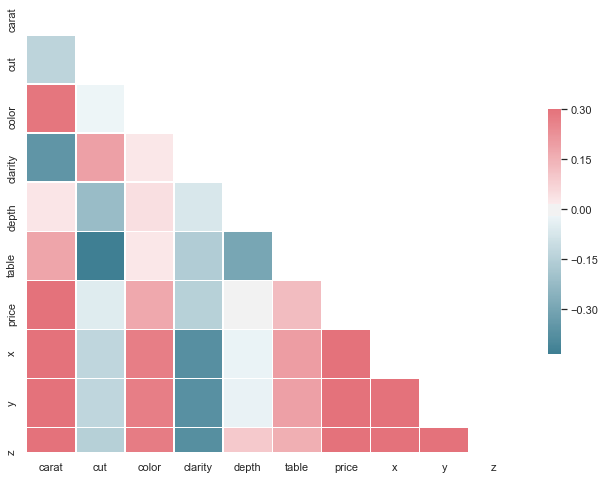

In [20]:
# your code here
sns.set(style="white")
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**What do you see here? Regarding the results before, does it fit with them?**

In [21]:
#your thoughts here
# yes, fits perfectly with all my conclusions so far and matches the previous pairplot

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

1.985829466853468e-07

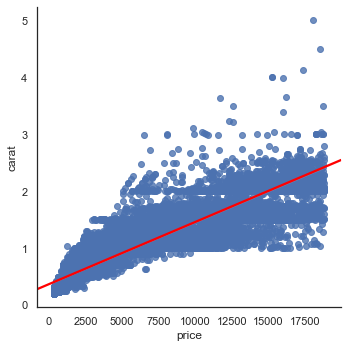

In [22]:
# your code here
from scipy import stats
sns.lmplot(x='price', y='carat', data=data, line_kws={'color': 'red'})
slope, intercept, r_value, p_value, std_err = stats.linregress(data['price'], data['carat'])
std_err

**What do you think?**

In [23]:
#your thoughts here
# the standard error is really low, so it seems like a good fit

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

C:\Users\felip\Miniconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


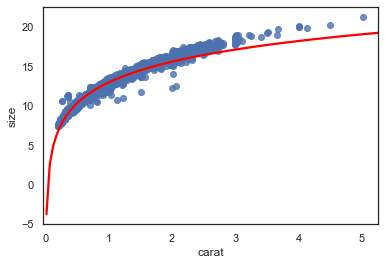

3.26811578895146e-07

In [24]:
#your thoughts here
# maybe check how well de size relates to the weight
# considering only x,y:
data['size'] = data.apply(lambda x: x['x']+x['y'], axis=1) 
# the function seems to be exponential, so i used regplot with logx:
sns.regplot(x='carat', y='size', data=data, line_kws={'color': 'red'}, logx=True)
plt.show()
# applying log in the y axis (not sure if it's how i should do this):
slope, intercept, r_value, p_value, std_err = stats.linregress(data['price'], np.log(data['carat']))
std_err
# also returns a really low standard error, so it is a good fit

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.